# **LINEAR REGRESSION**

###### *with multiple variable VOL 2*

## Import

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("community_health_MLR.csv")

In [40]:
df

,yas,cins,irk,kilo,boy,visits
0,47,0,4,112.0,165.0,28
1,26,1,3,128.0,168.0,23
2,26,1,2,91.0,173.0,14
3,39,1,3,108.0,185.0,21
4,55,1,1,90.0,155.0,27
...,...,...,...,...,...,...
995,43,0,5,124.0,173.0,22
996,34,0,4,112.0,193.0,16
997,54,0,2,141.0,190.0,27
998,38,1,5,29.0,190.0,7


___
___

## Veriyi Düzenleme

In [41]:
df["vki"] = round(df["kilo"] / (df["boy"]/100)**2,2)

In [42]:
df

,yas,cins,irk,kilo,boy,visits,vki
0,47,0,4,112.0,165.0,28,41.14
1,26,1,3,128.0,168.0,23,45.35
2,26,1,2,91.0,173.0,14,30.41
3,39,1,3,108.0,185.0,21,31.56
4,55,1,1,90.0,155.0,27,37.46
...,...,...,...,...,...,...,...
995,43,0,5,124.0,173.0,22,41.43
996,34,0,4,112.0,193.0,16,30.07
997,54,0,2,141.0,190.0,27,39.06
998,38,1,5,29.0,190.0,7,8.03


In [43]:
df.to_csv("community_health_evolved.csv", index=False)

<AxesSubplot:xlabel='visits', ylabel='vki'>

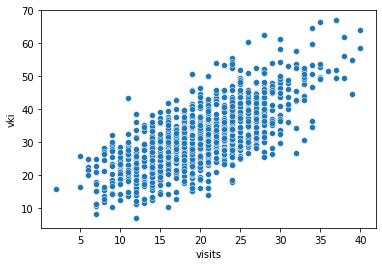

In [44]:
sns.scatterplot(data=df, x="visits",y="vki")

___
___

## Train Test

In [45]:
X = df.drop("visits", axis= 1)
y = df["visits"]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [48]:
# help(train_test_split)

In [49]:
X_train.head()

,yas,cins,irk,kilo,boy,vki
26,45,0,4,101.0,196.0,26.29
155,21,1,5,85.0,178.0,26.83
872,47,1,2,62.0,178.0,19.57
383,64,0,4,72.0,173.0,24.06
648,50,1,3,93.0,163.0,35.00


In [50]:
y_train.head()

26     18
155     8
872    18
383    20
648    24
Name: visits, dtype: int64

In [51]:
X_test.head()

,yas,cins,irk,kilo,boy,vki
890,72,1,2,88.0,175.0,28.73
983,47,0,2,79.0,183.0,23.59
107,16,0,2,108.0,170.0,37.37
609,34,0,2,61.0,168.0,21.61
113,50,1,2,133.0,170.0,46.02


In [52]:
y_test.head()

890    25
983    20
107    19
609    16
113    29
Name: visits, dtype: int64

___
___

## Lin Regr

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
regr = LinearRegression()

In [55]:
regr.fit(X_train, y_train)

LinearRegression()

In [56]:
test_preds = regr.predict(X_test)

In [57]:
test_preds

array([25.34311976, 16.5037453 , 15.60414784, 12.10491369, 28.5362271 ,
       12.2587607 , 18.411212  , 14.63955475, 26.09817428, 16.35592774,
       13.57781987, 17.16258514, 17.05124101, 14.27163737, 28.06344946,
       12.0026837 , 17.57511638, 21.7545155 , 24.45857394, 12.62777611,
       11.47791875, 31.22330671, 20.05551227, 16.77554977, 22.23132184,
       22.82554321, 22.02067926, 14.80713436, 32.58349968, 16.13953575,
       17.89059369, 28.08818939, 22.55423007, 30.23841629, 27.30619998,
       13.96647288, 18.28889699, 20.67325083, 10.74538092, 24.60587095,
       18.94650844, 18.53107846, 24.78279585, 20.74981825, 13.05260157,
       17.00861629, 24.56351225,  8.67119933, 19.87371849, 30.2344651 ,
       20.53624866, 24.17617868, 23.01227195, 16.49414282,  8.61858181,
       17.67257971, 14.59589495, 16.9767789 , 30.42772488, 20.68938835,
       21.62310853, 18.71584592, 12.90751342, 24.58207799, 17.9414054 ,
       14.53572823, 19.1102701 , 13.71234973, 15.89005831, 36.82

___
___

## Performance

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [59]:
print("Theta :     ", round(regr.coef_[0],2))
print("Intercept : ", round(regr.intercept_,2))
print("R^2 :       ", round(r2_score(y_test,test_preds),2))
print("MAE :       ", round(mean_absolute_error(y_test,test_preds),2))
print("RMSE :      ", round(np.sqrt(mean_squared_error(y_test,test_preds)),2))

Theta :      0.25
Intercept :  -7.48
R^2 :        0.86
MAE :        2.12
RMSE :       2.48


    Peki VKİ'yi sütun olarak eklemek model açısından doğru muydu?

In [60]:
df["visits"].mean()

19.956

In [61]:
df["visits"].std()

6.455054742737023

___
___

## FINAL

In [62]:
final = LinearRegression()

In [63]:
final.fit(X,y)

LinearRegression()

In [64]:
y_hat = final.predict(X)

In [65]:
final.coef_

array([0.24872833, 0.10676195, 0.02742311, 0.00632256, 0.00213747,
       0.48326475])

In [66]:
coef_df = pd.DataFrame(final.coef_, X.columns,columns=["Katsayı"])

In [67]:
coef_df

,Katsayı
yas,0.248728
cins,0.106762
irk,0.027423
kilo,0.006323
boy,0.002137
vki,0.483265


In [68]:
print(df["yas"].mean())
print(df["cins"].mean())
print(df["irk"].mean())
print(df["kilo"].mean())
print(df["boy"].mean())
print(df["vki"].mean())

45.019
0.481
3.155
90.283
170.914
31.52021


In [69]:
insancık = [[25,0,3,45,150,20]]

In [70]:
final.predict(insancık)

c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.02278549])

___
___

## Modeli Kaydetmek

In [71]:
from joblib import dump, load

In [72]:
dump(final, "dr_visit_2.joblib")

['dr_visit_2.joblib']

In [73]:
model_yukle = load("dr_visit_2.joblib")

In [74]:
model_yukle.predict(insancık)

c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.02278549])

___
___

## Residual ve Son Grafik 

In [75]:
residuals = y_hat - y

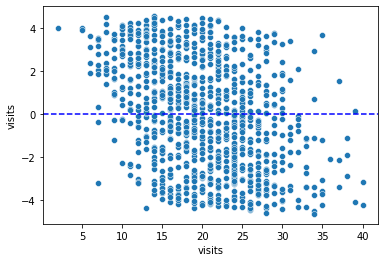

In [76]:
sns.scatterplot(x=y, y=residuals)
plt.axhline(y= 0, color="b", ls="--")

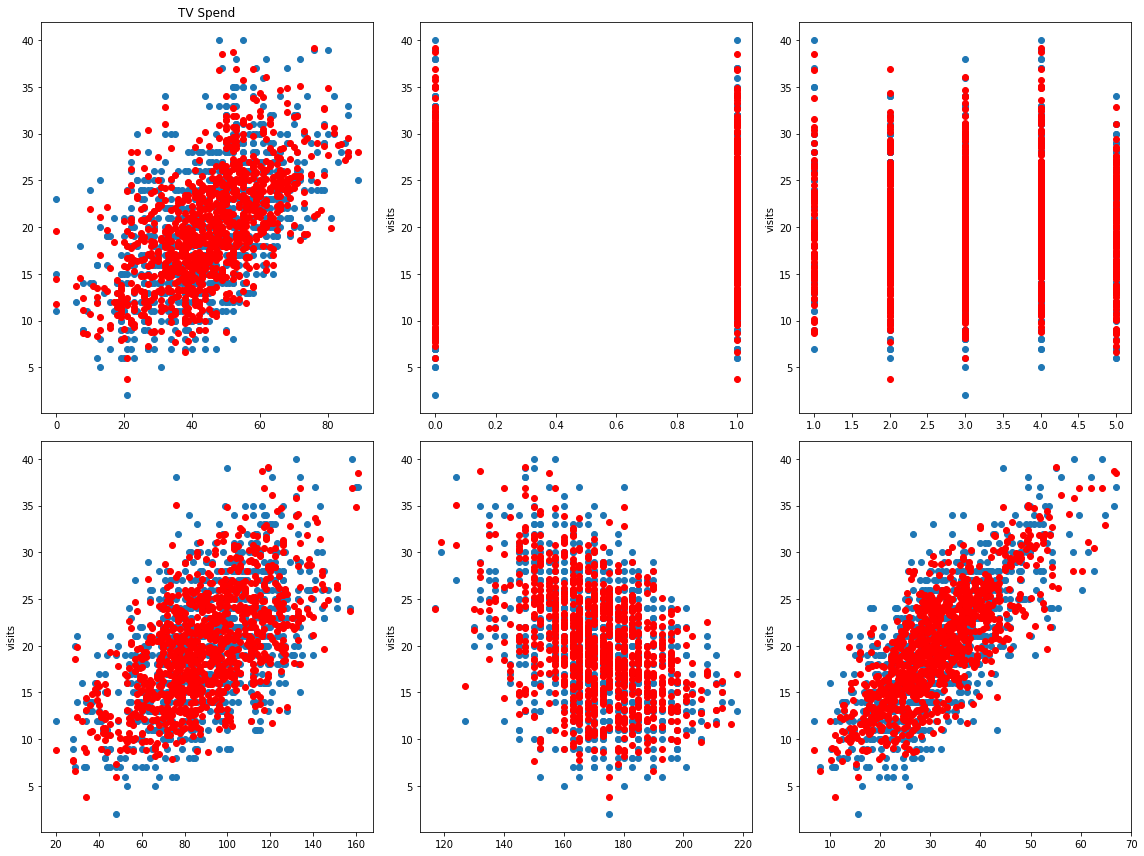

In [77]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,12))

axes[0,0].plot(df['yas'],df['visits'],'o')
axes[0,0].plot(df['yas'],y_hat,'o',color='red')
axes[0,0].set_title("TV Spend")

axes[0,1].plot(df['cins'],df['visits'],'o')
axes[0,1].plot(df['cins'],y_hat,'o',color='red')
axes[0,1].set_ylabel("visits")

axes[0,2].plot(df['irk'],df['visits'],'o')
axes[0,2].plot(df['irk'],y_hat,'o',color='red')
axes[0,2].set_ylabel("visits")

axes[1,0].plot(df['kilo'],df['visits'],'o')
axes[1,0].plot(df['kilo'],y_hat,'o',color='red')
axes[1,0].set_ylabel("visits")

axes[1,1].plot(df['boy'],df['visits'],'o')
axes[1,1].plot(df['boy'],y_hat,'o',color='red')
axes[1,1].set_ylabel("visits")

axes[1,2].plot(df['vki'],df['visits'],'o')
axes[1,2].plot(df['vki'],y_hat,'o',color='red')
axes[1,2].set_ylabel("visits")

plt.tight_layout();

___
___

# **Eline Sağlık Doktor**